In [24]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy
import corner

In [25]:
sigma = 0.1
N=20
x = np.linspace(0,3,N)
y_mod = 3*x + 1
yr = sigma*np.random.randn(N)
y = y_mod + yr
yerr = sigma + sigma*np.random.randn(N)

Usando los puntos del ejercicio_fit

In [26]:
#Prueba con recta del ejercicio
f = np.load('fit_exercise.npy')
x = f[0]
y = f[1]
yerr = f[2]

Definimos funciones de recta y likelihood

In [27]:
def recta(x,a,b):
    return a*x + b

def likelihood(t, datos):
    x = datos[0]
    y = datos[1]
    yerr = datos[2]
    modelo = recta(x, t[0], t[1])
    result = (y-modelo)**2 / yerr**2
    return -0.5*result.sum()


def prior_a(a):
    R=10
    if a >= (-R) and a <= R:
        p_a = 1/(2*R)
    else:
        p_a = 0
    return p_a

def prior_b(b):
    R=10
    if b >= (-R) and b <= R:
        p_b = 1/(2*R)
    else:
        p_b = 0
    return p_b

Esta es metrópolis para un solo caminador

<Figure size 432x288 with 0 Axes>

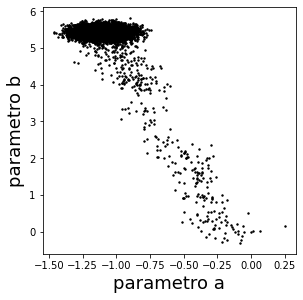

In [28]:
sigma_a = 0.1
sigma_b = 0.1

#Parametros iniciales.
ai = 0.
bi = 0.
a_walk = [ai]
b_walk = [bi]
posterior = likelihood([ai,bi],[x,y,yerr]) + np.log(prior_a(ai)) + np.log(prior_b(bi))


for i in range(10000): 
    a_rf = np.random.normal(ai,sigma_a) 
    b_rf = np.random.normal(bi,sigma_b) 
    post_new = likelihood([a_rf,b_rf],[x,y,yerr])  + np.log(prior_a(a_rf)) + np.log(prior_b(b_rf))
    
    
    if post_new > posterior:
        a_walk.append(a_rf)
        b_walk.append(b_rf)
        ai = a_rf
        bi = b_rf
        posterior = post_new
        
    
    else:
        r = np.random.uniform(0,1)
        div = (post_new/posterior)
        
        
        if div<r:
            a_walk.append(a_rf)
            b_walk.append(b_rf)
            ai = a_rf
            bi = b_rf
            posterior = post_new

        else:
            a_walk.append(a_rf)
            b_walk.append(b_rf)
            


plt.figure(3)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(a_walk,b_walk,s=2,color = 'black')
plt.ylabel('parametro b',fontsize=18)
plt.xlabel('parametro a',fontsize=18);


Plot con el último dato obtenido

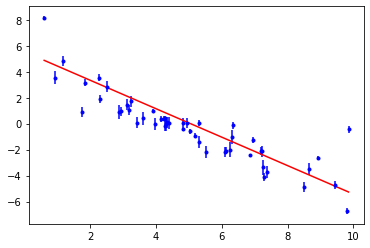

<Figure size 3600x2160 with 0 Axes>

In [29]:
plt.plot(x, a_rf*x + b_rf, color = 'red')
plt.errorbar(x, y, yerr, color = 'blue', fmt = '.')
plt.figure(figsize=(50,30));

In [34]:
def metropolis(ai,bi,datos,sigma):

    #Reordenamos el arreglo de a y b iniciales.

    len_ai=len(ai)
    ai = ai.T.reshape((len(ai),1))
    bi = bi.T.reshape((len(bi),1))
    datos = np.array(datos)
 
    #inicializar arreglo 
    post = [] 
    for i in range(len_ai):
        post.append(likelihood([ai[i][0],bi[i][0]],datos) + np.log(prior_a(ai[i][0])) + np.log(prior_b(bi[i][0])))
    
    #Arreglos a lista para usar append.
    a_l = ai.tolist()
    b_l = bi.tolist()
    
    
    for i in range(len_ai):
        post_i = post[i]
        k = 0
        usar_a = a_l[i][k]
        usar_b = b_l[i][k]
    
        
        for j in range(10000): 
            a_rf = np.random.normal(usar_a,sigma)
            b_rf = np.random.normal(usar_b,sigma)
            post_new = likelihood([a_rf,b_rf],datos)  + np.log(prior_a(a_rf)) + np.log(prior_b(b_rf))

            if post_new > post_i:
                a_l[i].append(a_rf)
                b_l[i].append(b_rf)
                usar_a = a_rf
                usar_b = b_rf
                post_i = post_new
                k = k+1

           
        
            else:
                r = np.random.uniform(0,1)
                div = (post_new/post_i)
                
                if div<r:
                    a_l[i].append(a_rf) 
                    b_l[i].append(b_rf)
                    usar_a = a_rf
                    usar_b = b_rf
                    post_i = post_new 
                    
                    k = k+1
                    
                
                
                else:

                    a_l[i].append(a_rf) 
                    b_l[i].append(b_rf)                  

                    k = k+1
            


    plt.figure(figsize=(8,8))    
    
    #Gráfica de todos los a y b creados
    for i in range(len_ai):     
        plt.scatter(a_l[i],b_l[i],s=1)
    plt.ylabel('parametro b',fontsize=17)
    plt.xlabel('parametro a',fontsize=17)
    plt.title("Varios Caminadores",fontsize=18)
    
    return a_l, b_l

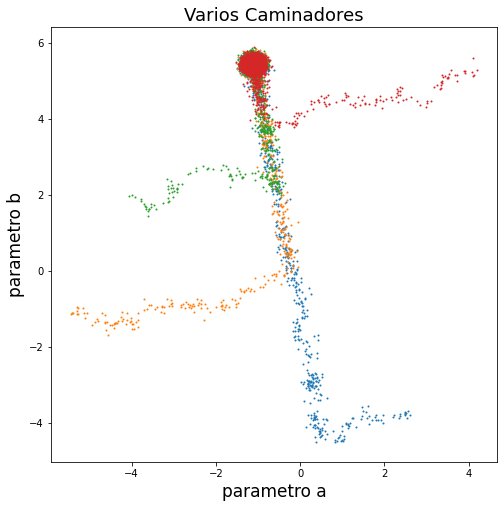

In [36]:
#multiples caminadores
datos = [x,y,yerr]
sigma = 0.1
a_ini = np.array([2.6,-5.4,-4,4.1])
b_ini = np.array([-3.8,-1.1,2,5.6])
a_w, b_w = metropolis(a_ini,b_ini,datos,sigma)



Grafica del triángulo

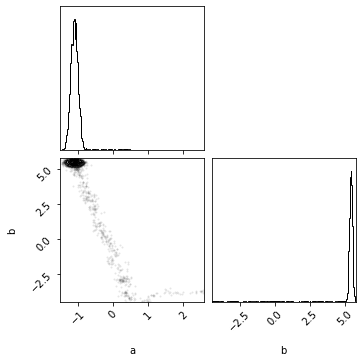

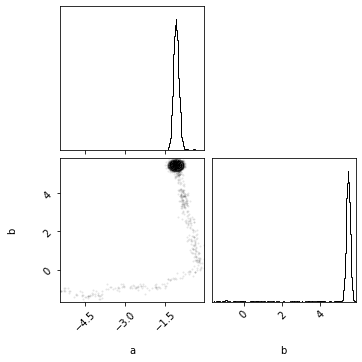

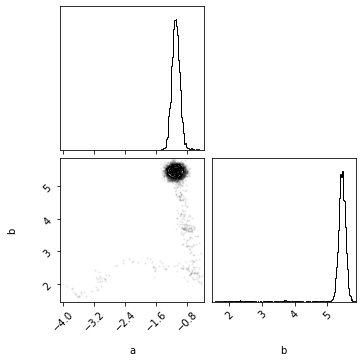

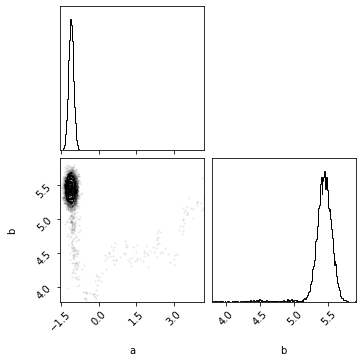

In [39]:
t = np.append(a_walk,b_walk)
t = np.append(a_walk,b_walk).reshape((2,len(a_walk))).T
for i in range(len(a_ini)):
    samples = np.append(a_w[i],b_w[i]).reshape((2,len(t))).T
    figure = corner.corner(samples,bins=[200,200],labels=["a", "b"])

Diagnostico de Gelman-Rubin

In [40]:
#Obtener promedio y varianza
X_a = []
for i in range(len(a_w)):
    X_a.append(np.mean(a_1[i]))
mu_a = np.mean(X_a)

Si2_a = []
for i in range(len(a_w)):
    Si2_a.append(np.std(a_1[i])**2)
S2_a = np.mean(Si2_a)


Bn_a = (1/(len(X_a)))*np.sum((X_a - mu_a)**2)
sigm2_a = ((len(a_1[0])-1)/(len(a_1[0]))) * S2_a + Bn_a
R_a = mt.sqrt(sigm2_a/S2_a)

print('R =',R_a)

R = 1.003062080639566


In [41]:
#Obtener promedio y varianza
X_b = []
for i in range(len(b_w)):
    X_b.append(np.mean(b_1[i]))
mu_b = np.mean(X_b)

Si2_b = []
for i in range(len(b_w)):
    Si2_b.append(np.std(b_1[i])**2)
S2_b = np.mean(Si2_b)


Bn_b = (1/(len(X_b)))*np.sum((X_b - mu_b)**2)
sigm2_b = ((len(b_1[0])-1)/(len(b_1[0]))) * S2_b + Bn_b
R_b = mt.sqrt(sigm2_b/S2_b)

print('R =',R_b)

R = 1.0059227152937733
